In [346]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.optimize import curve_fit
from scipy import odr
import glob
import os

In [347]:
Temps = [25, 31 ,35, 40, 45, 50, 55]
dens = [998.2, 998.2, 998.2, 998.2, 998.2, 998.2, 998.2]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

In [348]:
#Just pulling the distance data from the files for Deionised Water at varying temperatures

value25 = open('Deion25.txt','r')
value31 = open('Deion31.txt','r')
value35 = open('Deion35.txt','r')
value40 = open('Deion40.txt','r')
value45 = open('Deion45.txt','r')
value50 = open('Deion50.txt','r')
value55 = open('Deion55.txt','r')

values25 = value25.readlines()
values31 = value31.readlines()
values35 = value35.readlines()
values40 = value40.readlines()
values45 = value45.readlines()
values50 = value50.readlines()
values55 = value55.readlines()

Hz = 0
cm = 1
arr25 = []
arr31 = []
arr35 = []
arr40 = []
arr45 = []
arr50 = []
arr55 = []


for x in values25:
    arr25.append(x.split()[cm])
    
for x in values31:
    arr31.append(x.split()[cm])
    
for x in values35:
    arr35.append(x.split()[cm])
    
for x in values40:
    arr40.append(x.split()[cm])
    
for x in values45:
    arr45.append(x.split()[cm])
    
for x in values50:
    arr50.append(x.split()[cm])
    
for x in values55:
    arr55.append(x.split()[cm])

    

print(arr25)
print(arr31)
print(arr35)
print(arr40)
print(arr45)
print(arr50)
print(arr55)


['0.023', '0.0265', '0.028', '0.0305', '0.032', '0.034', '0.036', '0.0365', '0.0385', '0.04', '0.042', '0.0435', '0.045']
['0.0223', '0.0245', '0.0265', '0.028', '0.03', '0.0315', '0.033', '0.0345', '0.0365', '0.0385', '0.0395', '0.041', '0.0415']
['0.023', '0.024', '0.0275', '0.029', '0.0305', '0.0325', '0.034', '0.0345', '0.0365', '0.0385', '0.04', '0.0415', '0.0425']
['0.025', '0.027', '0.0275', '0.0285', '0.0315', '0.032', '0.0345', '0.0355', '0.0365', '0.039', '0.0395']
['0.0235', '0.0245', '0.0265', '0.029', '0.03', '0.031', '0.0335', '0.0345', '0.0365', '0.037', '0.039', '0.0405']
['0.024', '0.0245', '0.027', '0.028', '0.0305', '0.0315', '0.0335', '0.0355', '0.0365', '0.038', '0.0405', '0.0405']
['2.6', '2.8', '2.95', '3.1', '3.35', '3.65', '3.75', '3.85']


In [349]:
#Just pulling the frequency data from the files for Deionised Water at varying temperatures
Freq25 = []
Freq31 = []
Freq35 = []
Freq40 = []
Freq45 = []
Freq50 = []
Freq55 = []


for x in values25:
    Freq25.append(x.split()[Hz])
    
for x in values31:
    Freq31.append(x.split()[Hz])
    
for x in values35:
    Freq35.append(x.split()[Hz])
    
for x in values40:
    Freq40.append(x.split()[Hz])
    
for x in values45:
    Freq45.append(x.split()[Hz])
    
for x in values50:
    Freq50.append(x.split()[Hz])
    
for x in values55:
    Freq55.append(x.split()[Hz])

print(Freq25)
print(Freq31)
print(Freq35)
print(Freq40)
print(Freq45)
print(Freq50)
print(Freq55)

['160', '180', '200', '220', '240', '260', '280', '300', '320', '340', '360', '380', '400']
['160', '180', '200', '220', '240', '260', '280', '300', '320', '340', '360', '380', '400']
['160', '180', '200', '220', '240', '260', '280', '300', '320', '340', '360', '380', '400']
['200', '220', '240', '260', '280', '300', '320', '340', '360', '380', '400']
['180', '200', '220', '240', '260', '280', '300', '320', '340', '360', '380', '400']
['180', '200', '220', '240', '260', '280', '300', '320', '340', '360', '380', '400']
['160', '180', '200', '220', '240', '260', '280', '300']


In [350]:
#Since the data we were sent for the lab wasnt marcated or separated by any values now the strings must be converted by hand into arrays
arr25 =  [0.023, 0.0265, 0.028, 0.0305, 0.032, 0.034, 0.036, 0.0365, 0.0385, 0.04, 0.042, 0.0435, 0.045]
freq25 = [160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400]

arr31 = [0.0223, 0.0245, 0.0265, 0.028, 0.03, 0.0315, 0.033, 0.0345, 0.0365, 0.0385, 0.0395, 0.041, 0.0415]
freq31 = [160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400]

arr35 = [0.023, 0.024, 0.0275, 0.029, 0.0305, 0.0325, 0.034, 0.0345, 0.0365, 0.0385, 0.04, 0.0415, 0.0425]
freq35 = [160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400]

arr40 = [0.025, 0.027, 0.0275, 0.0285, 0.0315, 0.032, 0.0345, 0.0355, 0.0365, 0.039, 0.0395]
freq40 = [200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400]

arr45 = [0.0235, 0.0245, 0.0265, 0.029, 0.03, 0.031, 0.0335, 0.0345, 0.0365, 0.037, 0.039, 0.0405]
freq45 = [180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400]

arr50 = [0.024, 0.0245, 0.027, 0.028, 0.0305, 0.0315, 0.0335, 0.0355, 0.0365, 0.038, 0.0405, 0.0405]
freq50 = [180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400]

arr55 = [2.6, 2.8, 2.95, 3.1, 3.35, 3.65, 3.75, 3.85]
freq55 = [160, 180, 200, 220, 240, 260, 280, 300]



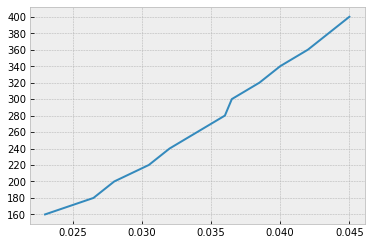

In [351]:
Hz = [Freq25, Freq31, Freq35, Freq40, Freq45, Freq50, Freq55]
arr = [arr25, arr31, arr35, arr40, arr45, arr50, arr55]

plt.plot(arr[0],Hz[0])

In [352]:

def sintheta(X,Y):
    return( ( X ) / ( np.sqrt( (X**2)+(Y**2) )) )

def theta(X,Y):
    return( np.arcsin( ( X ) / ( np.sqrt( (X**2)+(Y**2) )) ))

#dX is the distance between m =+-1
def theta1(dX):
    return( dX / (2* (np.sqrt( (H**2) + (l**2) ) )) )

def dH(X,Y,dX,dY):
    return( np.sqrt( (X*dX**2) + (dY**2) * Y**2 ) )

def k(d):
    k = (np.pi*h*d)/(lHz*( (h**2) + (l**2) ))
    return k

In [353]:
lHz = 632.8e-9
l = 4.838
Hw = 1.519
Ht = 1.027 
h = Hw - Ht
print(h)

arp25 = []
arp31 = []
arp35 = []
arp40 = []
arp45 = []
arp50 = []
arp55 = []

0.492


In [354]:
n=0
for i in arr25:
    #print(k(arr25[n]))
    arp25.append(k(arr25[n]))
    n = n+1
    if n == 13:
        arp25 = arp25
        
n=0
for i in arr31:
    #print(k(arr25[n]))
    arp31.append(k(arr31[n]))
    n = n+1
    if n == 13:
        arp31 = arp31
n=0
for i in arr35:
    #print(k(arr25[n]))
    arp35.append(k(arr35[n]))
    n = n+1
    if n == 13:
        arp35 = arp35
n=0
for i in arr40:
    #print(k(arr25[n]))
    arp40.append(k(arr40[n]))
    n = n+1
    if n == 13:
        arp40 = arp40
n=0
for i in arr45:
    #print(k(arr25[n]))
    arp45.append(k(arr45[n]))
    n = n+1
    if n == 13:
        arp45 = arp45
n=0
for i in arr50:
    #print(k(arr25[n]))
    arp50.append(k(arr50[n]))
    n = n+1
    if n == 13:
        arp50 = arp50
n=0
for i in arr55:
    #print(k(arr25[n]))
    arp55.append(k(arr55[n]))
    n = n+1
    if n == 13:
        arp55 = arp55

[7.77301211 7.91466263 7.96972241 8.05524458 8.1032538  8.16387842
 8.22103683 8.23483016 8.28817614 8.32639735 8.37518751 8.41027883
 8.44418039]


<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

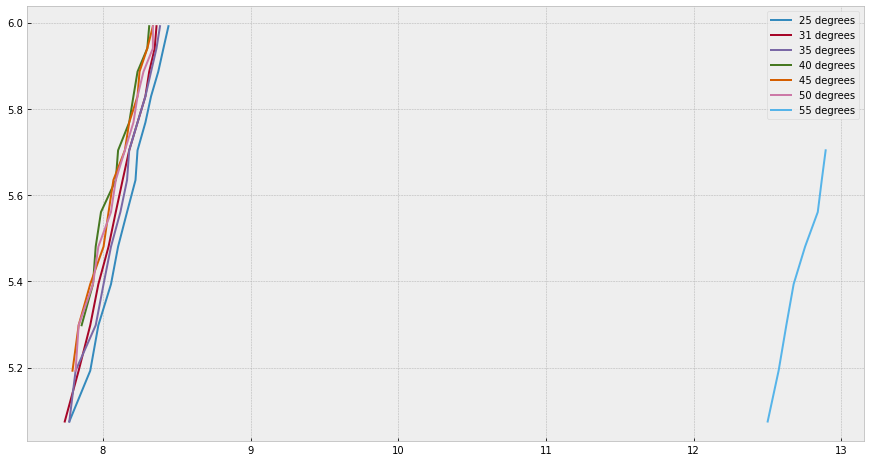

In [355]:
arp25 = np.log(arp25)
freqp25 = np.log(freq25)

arp31 = np.log(arp31)
freqp31 = np.log(freq31)

arp35 = np.log(arp35)
freqp35 = np.log(freq35)

arp40 = np.log(arp40)
freqp40 = np.log(freq40)

arp45 = np.log(arp45)
freqp45 = np.log(freq45)

arp50 = np.log(arp50)
freqp50 = np.log(freq50)

arp55 = np.log(arp55)
freqp55 = np.log(freq55)


#print(arp25)
plt.figure(figsize=(15,8))
plt.plot(arp25,freqp25,label = '25 degrees')
plt.plot(arp31,freqp31,label = '31 degrees')
plt.plot(arp35,freqp35,label = '35 degrees')
plt.plot(arp40,freqp40,label = '40 degrees')
plt.plot(arp45,freqp45,label = '45 degrees')
plt.plot(arp50,freqp50,label = '50 degrees')
plt.plot(arp55,freqp55,label = '55 degrees')
plt.legend()
plt.grid

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

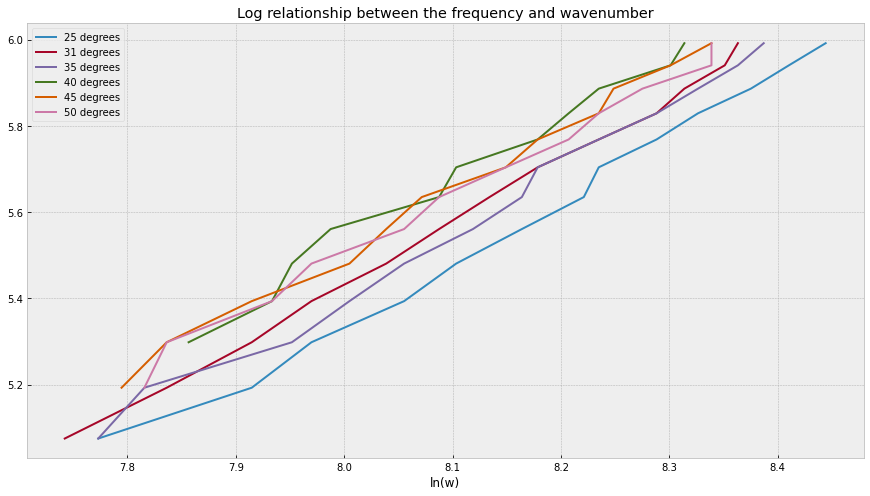

In [361]:
plt.figure(figsize=(15,8))


plt.plot(arp25,freqp25,label = '25 degrees')
plt.plot(arp31,freqp31,label = '31 degrees')
plt.plot(arp35,freqp35,label = '35 degrees')
plt.plot(arp40,freqp40,label = '40 degrees')
plt.plot(arp45,freqp45,label = '45 degrees')
plt.plot(arp50,freqp50,label = '50 degrees')
plt.title('Log relationship between the frequency and wavenumber')
plt.xlabel('ln(k)')
plt.xlabel('ln(w)')
plt.legend()
plt.grid